In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
#boostrap
data = [5.2, 5.0, 5.35, 5.1, 5.15, 5.12]
data = np.array(data)
boostrap = []
for i in range(10000):
  x = np.random.choice(data, size=len(data), replace = True)
  boostrap.append(np.mean(x))

boostrap

[np.float64(5.161666666666667),
 np.float64(5.195),
 np.float64(5.125),
 np.float64(5.2250000000000005),
 np.float64(5.166666666666666),
 np.float64(5.206666666666666),
 np.float64(5.156666666666666),
 np.float64(5.12),
 np.float64(5.12),
 np.float64(5.136666666666667),
 np.float64(5.153333333333332),
 np.float64(5.131666666666667),
 np.float64(5.12),
 np.float64(5.033333333333334),
 np.float64(5.208333333333333),
 np.float64(5.215000000000001),
 np.float64(5.183333333333333),
 np.float64(5.178333333333334),
 np.float64(5.125),
 np.float64(5.115),
 np.float64(5.161666666666666),
 np.float64(5.2),
 np.float64(5.168333333333333),
 np.float64(5.083333333333333),
 np.float64(5.114999999999999),
 np.float64(5.133333333333333),
 np.float64(5.148333333333333),
 np.float64(5.22),
 np.float64(5.2250000000000005),
 np.float64(5.1000000000000005),
 np.float64(5.141666666666667),
 np.float64(5.136666666666667),
 np.float64(5.191666666666667),
 np.float64(5.07),
 np.float64(5.153333333333333),
 np.

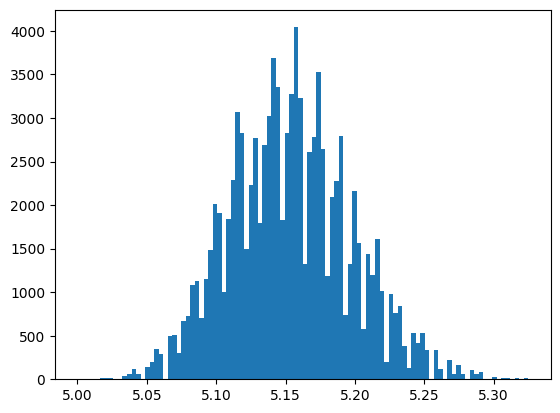

In [3]:
s = []
for i in range(100000):
  idx = np.random.randint(0, data.shape[0], data.shape[0])
  s.append(data[idx].mean())
s = np.array(s)
plt.hist(s, bins = 100)
plt.show()

In [4]:
print(f"B: {np.percentile(s, 4)}")

B: 5.081666666666666


In [5]:
#Среднее = 5.2
np.percentile(s, 4), 5.2, np.percentile(s, 94)

(np.float64(5.081666666666666), 5.2, np.float64(5.225))

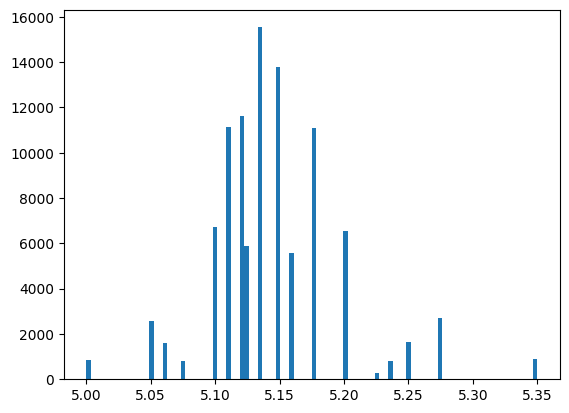

In [6]:
s = []
for i in range(100000):
  idx = np.random.randint(0, data.shape[0], data.shape[0])
  s.append(np.median(data[idx]))
s = np.array(s)
plt.hist(s, bins = 100)
plt.show()

In [7]:
# Медианна = 5.22
np.percentile(s, 4), 5.22, np.percentile(s, 94)

(np.float64(5.0600000000000005), 5.22, np.float64(5.234999999999999))

In [8]:
# Первый квантиль == 5.1
np.percentile(s, 4), np.percentile(s, 25), np.percentile(s, 94)

(np.float64(5.0600000000000005),
 np.float64(5.12),
 np.float64(5.234999999999999))

In [9]:
# Задача про экстрасенса
from scipy.stats import pearsonr
data = [0, 3, 2, 4, 9, 7, 0, 2, 3, 3]
amount = 0

for i in range(10000):
  x = np.random.randint(0, 10, size = 10)
  R1, pval = pearsonr(data, x)
  if pval < 0.05:
    amount+= 1
amount

508

In [10]:
# Задача бонферонни, поправка бонферони
from scipy.stats import pearsonr
data = [0, 3, 2, 4, 9, 7, 0, 2, 3, 3]
amount = 0

for i in range(10000):
  x = np.random.randint(0, 10, size = 10)
  R1, pval = pearsonr(data, x)
  if pval < 0.05 / 10000:
    amount+= 1
amount

0

In [11]:
import scipy.stats as ss
import numpy as np
INCORRECT=5000
CORRECT=15000
SIZE=10
np.random.seed=0
h0=ss.norm(3,1).rvs(size=(SIZE,INCORRECT))
h1=ss.norm(0,2).rvs(size=(SIZE,CORRECT))
h=np.concatenate((h0,h1),axis=1)

In [12]:
sP=[]
for i in range(h.shape[1]):
  m=h[:,i].mean()
  std=h[:,i].std()
  T=(m-0)/(std/np.sqrt(h.shape[0]))
  p_val=2*(1-ss.t.cdf(abs(T),df=h.shape[0]-1))
  sP.append(p_val)
sP = np.array(sP)
pv = 0.05 / 20000
P_u = sP
print(sP[sP > pv].shape[0])

17585


In [13]:
pv = 0.05 / 20000 # pv = 0.05
P_u = sP[5000:]
print(P_u[P_u < pv].shape[0], P_u[P_u > pv].shape[0])
P_u = sP[:5000]
print(P_u[P_u < pv].shape[0], P_u[P_u > pv].shape[0])

0 15000
2415 2585


In [14]:
#Метод холма
from statsmodels.stats.multitest import multipletests
reject, p_corrected, a1, a2 = multipletests(sP,
                                            alpha = 0.05,
                                            method = 'holm')

pv = 0.05
P_u = p_corrected[5000:]
print(P_u[P_u<pv].shape[0], P_u[P_u>pv].shape[0])
P_u = p_corrected[:5000]
print(P_u[P_u<pv].shape[0], P_u[P_u>pv].shape[0])

0 15000
2535 2465


In [15]:
# Метод бх
reject, p_corrected, a1, a2 = multipletests(sP,
                                            alpha = 0.05,
                                            method = 'fdr_bh')

pv = 0.05
P_u = p_corrected[5000:]
print(P_u[P_u<pv].shape[0], P_u[P_u>pv].shape[0])
P_u = p_corrected[:5000]
print(P_u[P_u<pv].shape[0], P_u[P_u>pv].shape[0])

255 14745
5000 0


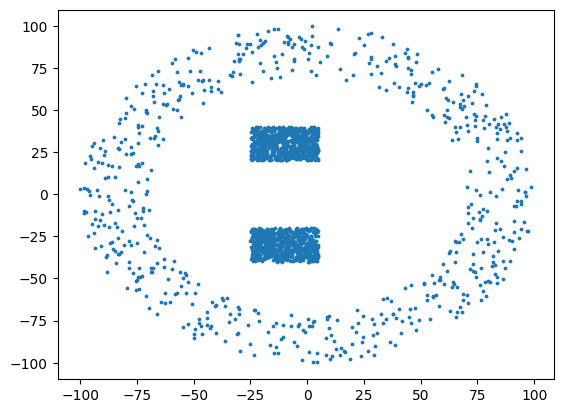

In [16]:
# Кластеризация
f = open('src2.dat')
d = []
for s in f:
  d.append([float(x) for x in s.split()])
d = np.array(d)
plt.scatter(d[:, 0], d[:, 1], s = 3)
plt.show()

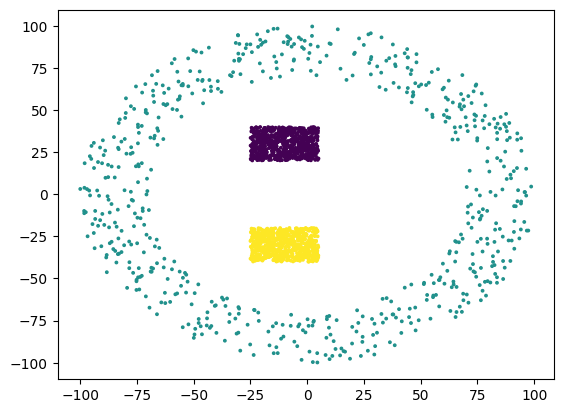

In [17]:
#DBSCAN
for s in f:
  d.append([float(x) for x in s.split()])
d = np.array(d)
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps = 10)
c = clf.fit_predict(d)
plt.scatter(d[:, 0], d[:, 1], s = 3, c = c)
plt.show()

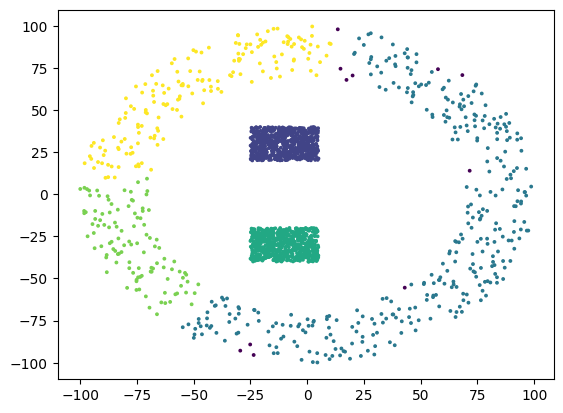

In [18]:
#Метрики качества для кластеризации
#коэф силуэта
s_opt = -1e100
e_opt = -1e100
c_opt = []
from sklearn.metrics import silhouette_score
for eps in list(np.linspace(1, 100, 100)):
  clf = DBSCAN(eps = eps)
  c = clf.fit_predict(d)
  if np.unique(c).shape[0] > 1:
    s = silhouette_score(d, c)
    if s > s_opt:
      s_opt = s
      e_opt = eps
      c_opt = c
s_opt, e_opt, c

plt.scatter(d[:, 0], d[:, 1], s= 3, c = c_opt)
plt.show()

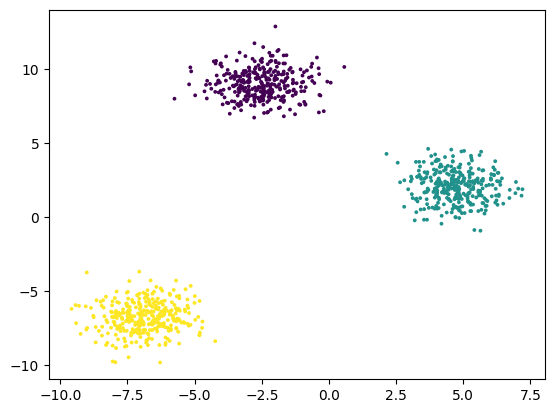

In [19]:
from sklearn.datasets import make_blobs
d, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

plt.scatter(d[:, 0], d[:, 1], s=3, c=y)
plt.show()

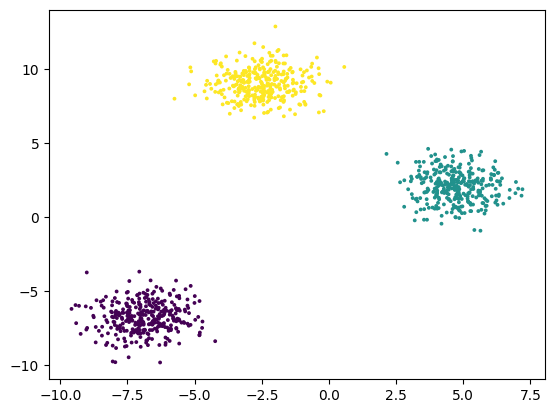

(0.8435705873891368, np.float64(2.0))

In [20]:
s_opt = -1e100
e_opt = -1e100
c_opt = []
for eps in list(np.linspace(1, 100, 100)):
  clf = DBSCAN(eps = eps)
  c = clf.fit_predict(d)
  if np.unique(c).shape[0] > 1:
    s = silhouette_score(d, c)
    if s > s_opt:
      s_opt = s
      e_opt = eps
      c_opt = c

plt.scatter(d[:, 0], d[:, 1], s= 3, c = c_opt)
plt.show()
s_opt, e_opt, #c_opt

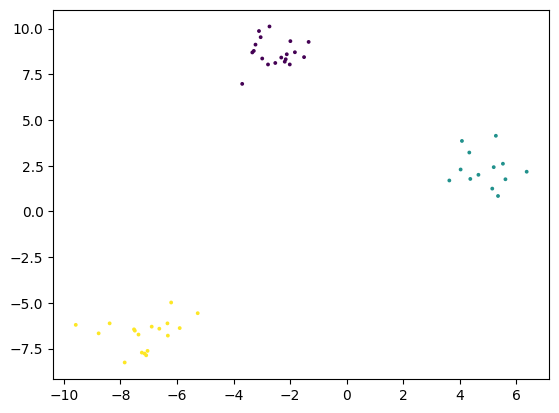

In [21]:
idx = np.array(range(y.shape[0]))
np.random.shuffle(idx)

idx2 = idx[:50]
plt.scatter(d[idx2, 0], d[idx2, 1], s=3, c=y[idx2])
plt.show()

1.0 1.0


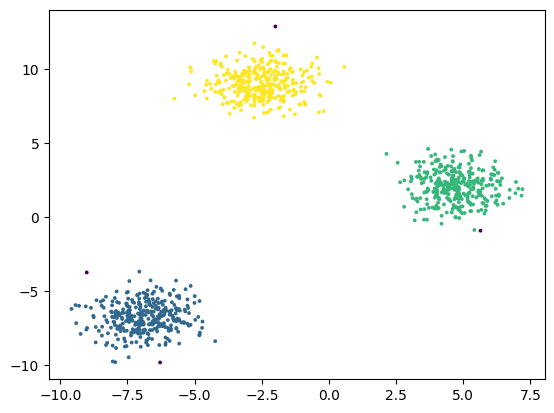

In [22]:
from sklearn.metrics import rand_score

s_opt = 0
e_opt = 0
c_opt = []

for eps in list(np.linspace(1, 30, 100)):
  clf = DBSCAN(eps=eps)
  c = clf.fit_predict(d)
  s = rand_score(y[idx2], c[idx2])
  if s > s_opt:
    s_opt = s
    e_opt = eps
    c_opt = c

print(s_opt, e_opt)

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()


1.0 1.0


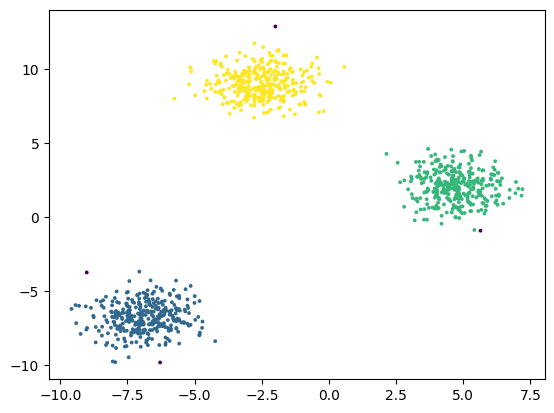

In [23]:
from sklearn.metrics import adjusted_rand_score
s_opt = 0
e_opt = 0
c_opt = []

for eps in list(np.linspace(1, 30, 100)):
  clf = DBSCAN(eps=eps)
  c = clf.fit_predict(d)
  s = adjusted_rand_score(y[idx2], c[idx2])
  if s > s_opt:
    s_opt = s
    e_opt = eps
    c_opt = c

print(s_opt, e_opt)

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()


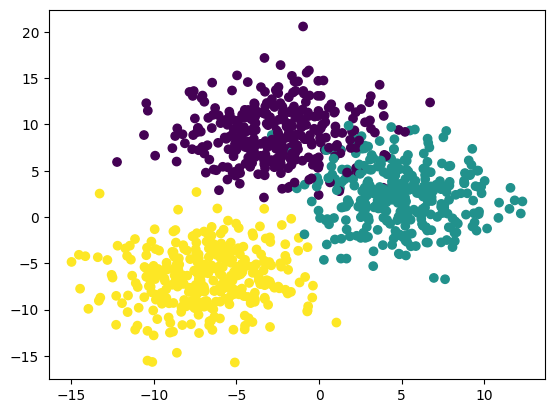

In [24]:
d, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std = 3, random_state=42)

plt.scatter(d[:, 0], d[:, 1], c=y)
plt.show()

0.6048278717321488 1.5858585858585859


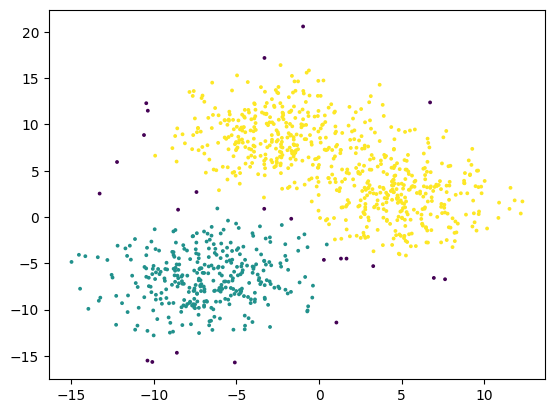

In [25]:
s_opt = 0
e_opt = 0
c_opt = []

for eps in list(np.linspace(1, 30, 100)):
  clf = DBSCAN(eps=eps)
  c = clf.fit_predict(d)
  s = adjusted_rand_score(y[idx2], c[idx2])
  if s > s_opt:
    s_opt = s
    e_opt = eps
    c_opt = c

print(s_opt, e_opt)

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()


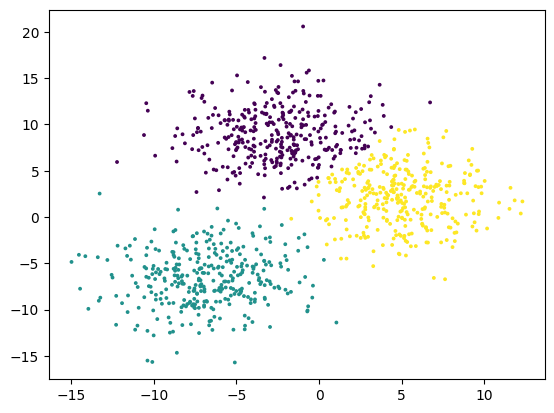

In [26]:
from sklearn.mixture import GaussianMixture
d, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std = 3, random_state=42)
clf = GaussianMixture(n_components = 3)
c = clf.fit_predict(d)


plt.scatter(d[:, 0], d[:, 1], s=3, c=c)
plt.show()

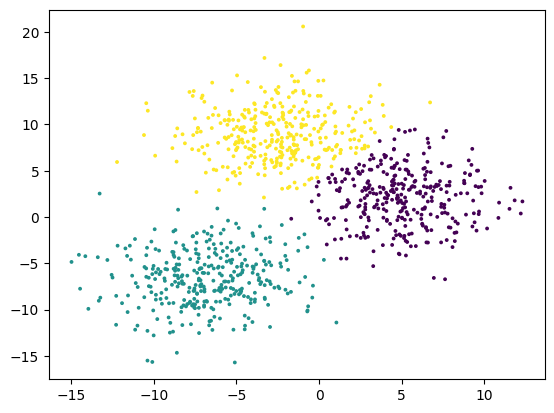

In [27]:
#BIC
d, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std = 3, random_state=42)
bic_opt = 1e100
n_opt = -1
c_opt = []

for n in range(1, 20):
  clf = GaussianMixture(n_components=n)
  c= clf.fit_predict(d)
  bic = clf.bic(d)
  if bic < bic_opt:
    bic_opt = bic
    n_opt = n
    c_opt = c

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()

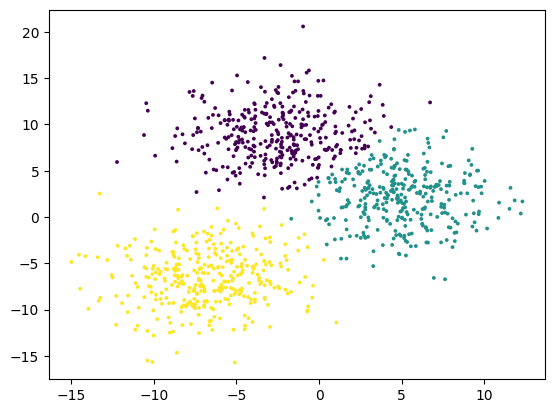

In [28]:
#AIC
bic_opt = 1e100
n_opt = -1
c_opt = []

for n in range(1, 20):
  clf = GaussianMixture(n_components=n)
  c= clf.fit_predict(d)
  bic = clf.aic(d)
  if bic < bic_opt:
    bic_opt = bic
    n_opt = n
    c_opt = c

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()


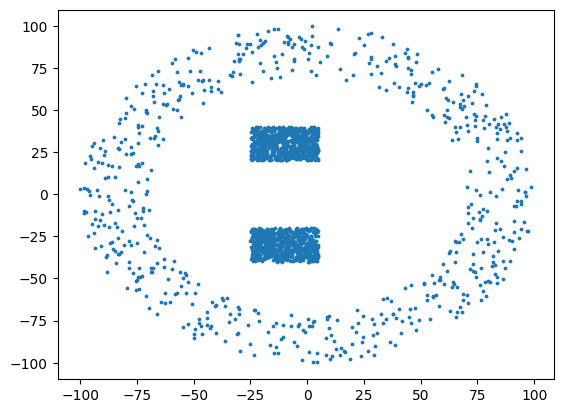

In [29]:
f = open('src2.dat')
d = []
for s in f:
  d.append([float(x) for x in s.split()])
d = np.array(d)
plt.scatter(d[:, 0], d[:, 1], s = 3)
plt.show()

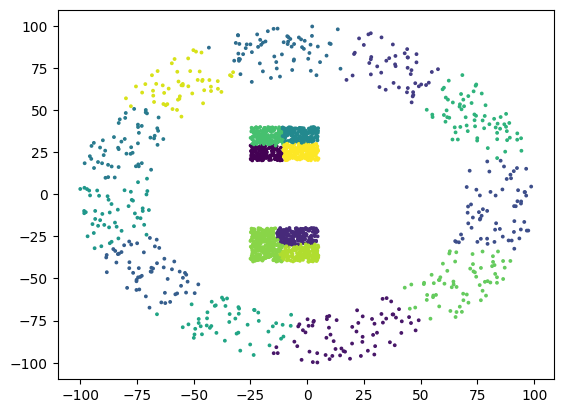

In [30]:
bic_opt = 1e100
n_opt = -1
c_opt = []

for n in range(1, 20):
  clf = GaussianMixture(n_components=n)
  c= clf.fit_predict(d)
  bic = clf.aic(d)
  if bic < bic_opt:
    bic_opt = bic
    n_opt = n
    c_opt = c

plt.scatter(d[:, 0], d[:, 1], s=3, c=c_opt)
plt.show()
